## MLB: Analyzing Regular Season Series Win Impact on Postseason Performance

The goal of this project is to analyze the impact that winning series in the regular season has on the performance of a team in the playoffs. Often, teams with the most overall wins are considered the strongest contenders in the playoffs. However, MLB playoffs are played in a series format, therefore, examining a team's ability to win series, as opposed to games, could provide further insight.

Throughout this project, we will look at historical data to examine how total wins and series wins differ among playoff results for a team.

The Data: retrosheet.org provides extremely valuable historical data and we will be using the game logs data to analyze past performances.

 **The information used here was obtained free of
     charge from and is copyrighted by Retrosheet.  Interested
     parties may contact Retrosheet at "www.retrosheet.org".**

In [1]:
#necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
season2021 = pd.read_csv("GL2021.TXT", sep=",", header=None)
season2021 = season2021.iloc[:, :11]
season2021 = season2021.drop([0, 1, 2, 4, 5, 7, 8], axis=1)
season2021.columns = ("away", "home", "aruns", "hruns")
season2021["awin"] = season2021["aruns"] > season2021["hruns"]
season2021.head()

,away,home,aruns,hruns,awin
0,PIT,CHN,5,3,True
1,SLN,CIN,11,6,True
2,LAN,COL,5,8,False
3,TBA,MIA,1,0,True
4,MIN,MIL,5,6,False


In [3]:
teams2021 = season2021["away"].unique()
print(teams2021)

['PIT' 'SLN' 'LAN' 'TBA' 'MIN' 'ATL' 'ARI' 'CHA' 'CLE' 'TEX' 'TOR' 'HOU'
 'SFN' 'BAL' 'MIL' 'NYN' 'KCA' 'MIA' 'CHN' 'BOS' 'OAK' 'SEA' 'ANA' 'CIN'
 'PHI' 'WAS' 'COL' 'DET' 'NYA' 'SDN']


In [4]:
for team in teams2021:
    locals()[team] = season2021[(season2021['away'] == team) | (season2021['home'] == team)]
PIT.head(8)

,away,home,aruns,hruns,awin
0,PIT,CHN,5,3,True
20,PIT,CHN,1,5,False
34,PIT,CHN,3,4,False
47,PIT,CIN,3,5,False
60,PIT,CIN,1,14,False
74,PIT,CIN,4,11,False
90,CHN,PIT,4,2,True
110,CHN,PIT,2,8,False


In [5]:
seriesResults2021 = pd.DataFrame(columns=["team", "series_wins", "series_losses", "series_ties", "win - loss", "game_wins", "game_losses"])
for team in teams2021:
    locals()[team] = season2021[(season2021['away'] == team) | (season2021['home'] == team)]
    counter = 1
    starter = 0
    wincounter = 0
    totalwins = 0
    totallosses = 0
    prevaway = ""
    prevhome = ""
    countlist = []
    serieswin = 0
    seriestie = 0
    seriesloss = 0
    for i in range(len(locals()[team])):
        away = locals()[team].iloc[i, 0]
        home = locals()[team].iloc[i, 1]
        awin = locals()[team].iloc[i, 4]
        try:
            nextaway = locals()[team].iloc[i+1, 0]
            nexthome = locals()[team].iloc[i+1, 1]
        except:
            nextaway = ""
            nexthome = ""
        if (away == nextaway and home == nexthome):
            starter = 1
            counter += 1
            if ((away == team and awin == True) or (home == team and awin == False)):
                wincounter += 1
                totalwins += 1
            else:
                totallosses+=1
        else:
            if ((away == team and awin == True) or (home == team and awin == False)):
                wincounter += 1
                totalwins += 1
            else:
                totallosses+=1
            winning = (wincounter / (counter))
            if counter > 1:
                if (winning == 0.5):
                    seriestie += 1
                elif (winning > 0.5):
                    serieswin += 1
                else:
                    seriesloss += 1
            counter = 1
            wincounter = 0
        countlist.append(counter)
        prevaway = away
        prevhome = home
    seriesline = [team, serieswin, seriesloss, seriestie, serieswin - seriesloss, totalwins, totallosses]
    seriesResults2021.loc[len(seriesResults2021)] = seriesline
seriesResults2021 = seriesResults2021.sort_values(by="game_wins", ascending=False)
seriesResults2021['win_rank'] = np.arange(seriesResults2021.shape[0])
seriesResults2021 = seriesResults2021.sort_values(by="series_wins", ascending=False)
seriesResults2021['series_rank'] = np.arange(seriesResults2021.shape[0])
seriesResults2021["series_rank - win_rank"] = np.subtract(seriesResults2021["series_rank"], seriesResults2021["win_rank"])
seriesResults2021.head(30)

,team,series_wins,series_losses,series_ties,win - loss,game_wins,game_losses,win_rank,series_rank,series_rank - win_rank
12,SFN,36,11,5,25,107,55,0,0,0
2,LAN,35,13,4,22,106,56,1,1,0
14,MIL,32,17,3,15,95,67,3,2,-1
11,HOU,32,16,4,16,95,67,4,3,-1
3,TBA,31,16,5,15,100,62,2,4,2
28,NYA,30,18,4,12,92,70,6,5,-1
5,ATL,27,17,7,10,88,73,11,6,-5
21,SEA,27,20,5,7,90,72,9,7,-2
10,TOR,26,18,8,8,91,71,8,8,0
19,BOS,26,19,7,7,92,70,7,9,2


In [116]:
excluded_years = [1994]
winresults = []
loseresults = []
topWinSeriesRank = 0
topLossSeriesRank = 0
topTotalWinRank = 0
seriesWinRank = []
seriesLossRank = []
winRank = []
topTotalWinBothRank = 0
topWinSeriesBothRank = 0
topLoseSeriesBothRank = 0
for year in range(1995, 2022): 
    if year not in excluded_years:
        seasonData = "season" + str(year)
        txtFile = "GL" + str(year) + ".TXT"
        locals()[seasonData] = pd.read_csv(txtFile, sep=",", header=None)
        locals()[seasonData] = locals()[seasonData].iloc[:, :11]
        locals()[seasonData] = locals()[seasonData].drop([0, 1, 2, 4, 5, 7, 8], axis=1)
        locals()[seasonData].columns = ("away", "home", "aruns", "hruns")
        locals()[seasonData]["awin"] = locals()[seasonData]["aruns"] > locals()[seasonData]["hruns"]
        teamList = locals()[seasonData]["away"].unique()
        seriesResultSeason = "seriesResults" + str(year)
        locals()[seriesResultSeason] = pd.DataFrame(columns=["team", "series_wins", "series_losses", "series_ties", "win - loss", "game_wins", "game_losses"])
        for team in teamList:
            locals()[team] = locals()[seasonData][(locals()[seasonData]['away'] == team) | (locals()[seasonData]['home'] == team)]
            counter = 1
            starter = 0
            wincounter = 0
            totalwins = 0
            totallosses = 0
            prevaway = ""
            prevhome = ""
            countlist = []
            serieswin = 0
            seriestie = 0
            seriesloss = 0
            for i in range(len(locals()[team])):
                away = locals()[team].iloc[i, 0]
                home = locals()[team].iloc[i, 1]
                awin = locals()[team].iloc[i, 4]
                try:
                    nextaway = locals()[team].iloc[i+1, 0]
                    nexthome = locals()[team].iloc[i+1, 1]
                except:
                    nextaway = ""
                    nexthome = ""
                if (away == nextaway and home == nexthome):
                    starter = 1
                    counter += 1
                    if ((away == team and awin == True) or (home == team and awin == False)):
                        wincounter += 1
                        totalwins += 1
                    else:
                        totallosses+=1
                else:
                    if ((away == team and awin == True) or (home == team and awin == False)):
                        wincounter += 1
                        totalwins += 1
                    else:
                        totallosses+=1
                    winning = (wincounter / (counter))
                    if counter > 1:
                        if (winning == 0.5):
                            seriestie += 1
                        elif (winning > 0.5):
                            serieswin += 1
                        else:
                            seriesloss += 1
                    counter = 1
                    wincounter = 0
                countlist.append(counter)
                prevaway = away
                prevhome = home
            seriesline = [team, serieswin, seriesloss, seriestie, serieswin - seriesloss, totalwins, totallosses]
            locals()[seriesResultSeason].loc[len(locals()[seriesResultSeason])] = seriesline
        locals()[seriesResultSeason] = locals()[seriesResultSeason].sort_values(by="game_wins", ascending=False)
        locals()[seriesResultSeason]['win_rank'] = np.arange(locals()[seriesResultSeason].shape[0])
        locals()[seriesResultSeason] = locals()[seriesResultSeason].sort_values(by="series_wins", ascending=False)
        locals()[seriesResultSeason]['series_rank'] = np.arange(locals()[seriesResultSeason].shape[0])
        locals()[seriesResultSeason] = locals()[seriesResultSeason].sort_values(by="series_losses", ascending=True)
        locals()[seriesResultSeason]['loss_rank'] = np.arange(locals()[seriesResultSeason].shape[0])
        locals()[seriesResultSeason]["series_rank - win_rank"] = np.subtract(locals()[seriesResultSeason]["series_rank"], locals()[seriesResultSeason]["win_rank"])
        locals()[seriesResultSeason]["loss_rank - win_rank"] = np.subtract(locals()[seriesResultSeason]["loss_rank"], locals()[seriesResultSeason]["win_rank"])
        worldSeriesWinners = pd.read_csv("worldserieswinnersimple.csv")
        yearWorld = worldSeriesWinners[worldSeriesWinners["year"] == year]
        winWorld = yearWorld.iloc[0]["winner"]
        loseWorld = yearWorld.iloc[0]["loser"]
        winLine = locals()[seriesResultSeason][locals()[seriesResultSeason]["team"] == winWorld]
        loseLine = locals()[seriesResultSeason][locals()[seriesResultSeason]["team"] == loseWorld]
        winresults.append(winLine.iloc[0]["series_rank - win_rank"])
        loseresults.append(winLine.iloc[0]["loss_rank - win_rank"])
        seriesWinRank.append(winLine.iloc[0]["series_rank"])
        seriesLossRank.append(winLine.iloc[0]["loss_rank"])
        winRank.append(winLine.iloc[0]["win_rank"])
        #if winLine.iloc[0]["win_rank"] == 0 or winLine.iloc[0]["win_rank"] == 1 or winLine.iloc[0]["win_rank"] == 2 or winLine.iloc[0]["win_rank"] == 3 or winLine.iloc[0]["win_rank"] == 4 or winLine.iloc[0]["win_rank"] == 5  or winLine.iloc[0]["win_rank"] == 6 or winLine.iloc[0]["win_rank"] == 7 or winLine.iloc[0]["win_rank"] == 8 or winLine.iloc[0]["win_rank"] == 9:
        #    topTotalWinRank += 1
        #if winLine.iloc[0]["series_rank"] == 0 or winLine.iloc[0]["series_rank"] == 1 or winLine.iloc[0]["series_rank"] == 2 or winLine.iloc[0]["series_rank"] == 3 or winLine.iloc[0]["series_rank"] == 4 or winLine.iloc[0]["series_rank"] == 5 or winLine.iloc[0]["series_rank"] == 6 or winLine.iloc[0]["series_rank"] == 7 or winLine.iloc[0]["series_rank"] == 8 or winLine.iloc[0]["series_rank"] == 9:
        #    print(year)
        #    topWinSeriesRank += 1
        #if winLine.iloc[0]["loss_rank"] == 0 or winLine.iloc[0]["loss_rank"] == 1 or winLine.iloc[0]["loss_rank"] == 2 or winLine.iloc[0]["loss_rank"] == 3 or winLine.iloc[0]["loss_rank"] == 4 or winLine.iloc[0]["loss_rank"] == 5 or winLine.iloc[0]["loss_rank"] == 6 or winLine.iloc[0]["loss_rank"] == 7 or winLine.iloc[0]["loss_rank"] == 8 or winLine.iloc[0]["loss_rank"] == 9:
        #    topLossSeriesRank += 1
        if year == 2021:
            print(locals()[seriesResultSeason])
        numTeams = 10
        if winLine.iloc[0]["win_rank"] in np.arange(0, numTeams):
            topTotalWinBothRank += 1
        if loseLine.iloc[0]["win_rank"] in np.arange(0, numTeams):
            topTotalWinBothRank += 1
        if winLine.iloc[0]["series_rank"] in np.arange(0, numTeams): 
            topWinSeriesBothRank += 1
        if loseLine.iloc[0]["series_rank"] in np.arange(0, numTeams):
            topWinSeriesBothRank += 1
        if winLine.iloc[0]["loss_rank"] in np.arange(0, numTeams):
            topLoseSeriesBothRank += 1
        if loseLine.iloc[0]["loss_rank"] in np.arange(0, numTeams):
            topLoseSeriesBothRank += 1
        print(year)
            

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
   team series_wins series_losses series_ties win - loss game_wins  \
12  SFN          36            11           5         25       107   
2   LAN          35            13           4         22       106   
11  HOU          32            16           4         16        95   
3   TBA          31            16           5         15       100   
14  MIL          32            17           3         15        95   
5   ATL          27            17           7         10        88   
7   CHA          26            17           8          9        93   
28  NYA          30            18           4         12        92   
10  TOR          26            18           8          8        91   
19  BOS          26            19           7          7        92   
21  SEA          27            20           5          7        90   
29  SDN          20           

In [53]:
#for series_rank - win_rank
print("Mean: ", np.mean(winresults))
print("Max: ", max(winresults))
print("Min: ", min(winresults))
print("Sum: ", sum(winresults))

Mean:  -0.48148148148148145
Max:  4
Min:  -6
Sum:  -13


In [54]:
#for loss_rank - win_rank
print("Mean: ", np.mean(loseresults))
print("Max: ", max(loseresults))
print("Min: ", min(loseresults))
print("Sum: ", sum(loseresults))

Mean:  -0.7407407407407407
Max:  4
Min:  -7
Sum:  -20


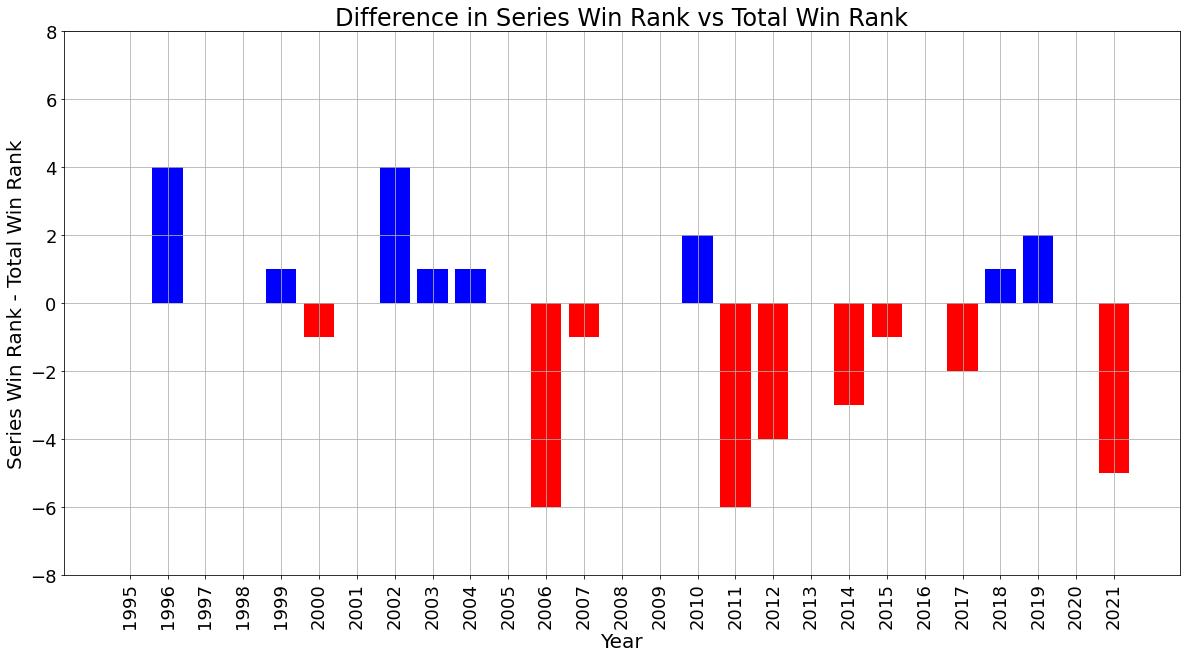

In [19]:
yearsList = range(1995, 2022)
winresults = np.asarray(winresults)
seriesWinResults = pd.DataFrame(list(zip(yearsList, winresults)), columns =['Year', 'Diff'])
fig = plt.figure(figsize=(20, 10))
plt.bar(yearsList,winresults, color=np.where(winresults > 0, 'blue', 'red'))
plt.title('Difference in Series Win Rank vs Total Win Rank', fontsize=24)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Series Win Rank - Total Win Rank', fontsize=20)
plt.xticks(np.arange(1995, 2022, step=1), fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.ylim([-8, 8])
plt.grid(visible=True)
fig.savefig('winrankseries.jpg')
plt.show()

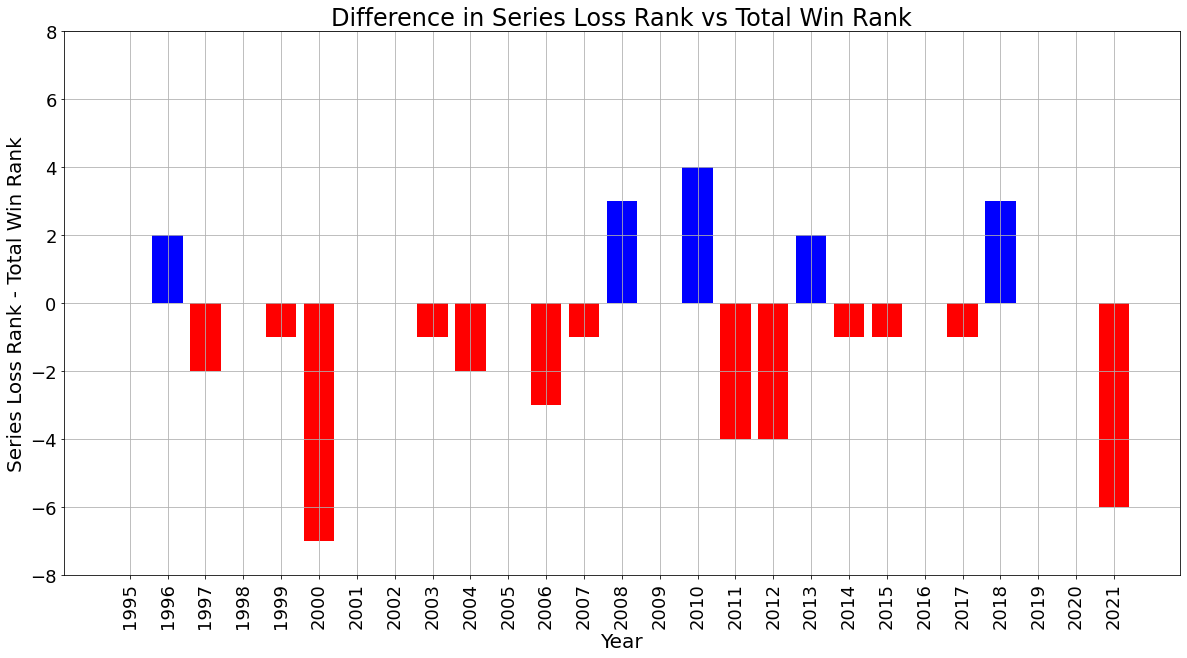

In [20]:
yearsList = range(1995, 2022)
loseresults = np.asarray(loseresults)
seriesLoseResults = pd.DataFrame(list(zip(yearsList, loseresults)), columns =['Year', 'Diff'])
fig = plt.figure(figsize=(20, 10))
plt.bar(yearsList,loseresults, color=np.where(loseresults > 0, 'blue', 'red'))
plt.title('Difference in Series Loss Rank vs Total Win Rank', fontsize=24)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Series Loss Rank - Total Win Rank', fontsize=20)
plt.xticks(np.arange(1995, 2022, step=1), fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.ylim([-8, 8])
plt.grid(visible=True)
fig.savefig('loserankseries.jpg')
plt.show()

In [21]:
print("Number of Top Ranked Win Team World Series Wins: ", topTotalWinRank)
print("Number of Top Ranked Series Win Team World Series Wins: ", topWinSeriesRank)
print("Number of Top Ranked Series Loss Team World Series Wins: ", topLossSeriesRank)

Number of Top Ranked Win Team World Series Wins:  25
Number of Top Ranked Series Win Team World Series Wins:  26
Number of Top Ranked Series Loss Team World Series Wins:  27


In [15]:
print("Average Total Win Rank: ", np.mean(winRank))
print("Average Series Win Rank: ", np.mean(seriesWinRank))
print("Average Series Loss Rank: ", np.mean(seriesLossRank))

Average Total Win Rank:  3.7037037037037037
Average Series Win Rank:  3.2222222222222223
Average Series Loss Rank:  2.962962962962963


In [105]:
#winRankSpread = [6, 9, 13, 16, 18, 20, 21, 21, 24, 25]
#seriesRankSpread = [7, 11, 13, 16, 17, 18, 23, 26, 26, 26]
#lossRankSpread = [6, 13, 15, 17, 19, 22, 22, 23, 26, 27]
winRankSpread = [6, 9, 13, 16, 18]
seriesRankSpread = [7, 11, 13, 16, 17]
lossRankSpread = [6, 13, 15, 17, 19]

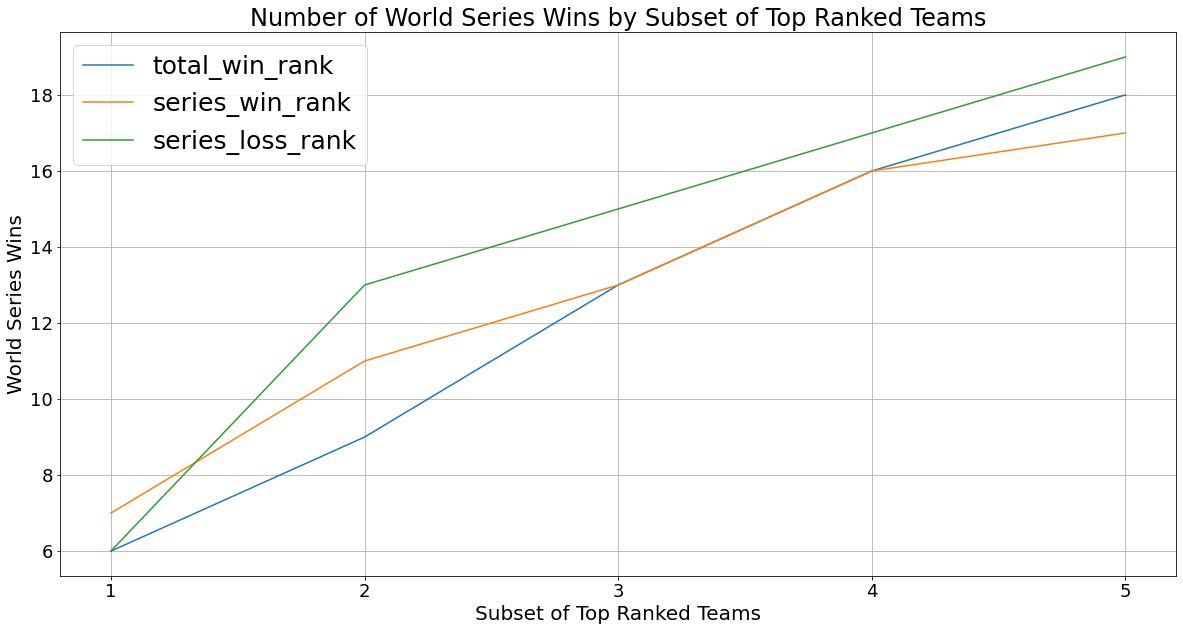

In [115]:
fig = plt.figure(figsize=(20, 10))
plt.plot(winRankSpread, label="total_win_rank")
plt.plot(seriesRankSpread, label="series_win_rank")
plt.plot(lossRankSpread, label="series_loss_rank")
plt.title('Number of World Series Wins by Subset of Top Ranked Teams', fontsize=24)
plt.xlabel('Subset of Top Ranked Teams', fontsize=20)
plt.ylabel('World Series Wins', fontsize=20)
plt.xticks(np.arange(0, 5, step=1), labels=("1", "2", "3", "4", "5"), fontsize=18)
plt.yticks(fontsize=18)
plt.grid(visible=True)
plt.legend(prop={'size': 25})
fig.savefig('worldSeriesRankSpreads.jpg')
plt.show()

In [98]:
print("Number of Top Ranked Win Team World Series Makes: ", topTotalWinBothRank)
print("Number of Top Ranked Series Team World Series Makes: ", topWinSeriesBothRank)
print("Number of Top Ranked Series Loss Team World Series Makes: ", topLoseSeriesBothRank)

Number of Top Ranked Win Team World Series Makes:  51
Number of Top Ranked Series Team World Series Makes:  47
Number of Top Ranked Series Loss Team World Series Makes:  51


In [101]:
winRankMakeSpread = [11, 15, 17, 22, 25]
seriesRankMakeSpread = [12, 17, 20, 22, 23]
lossRankMakeSpread = [12, 17, 20, 25, 26]
winRankMakeSpread2 = [11, 18, 24, 31, 36]
seriesRankMakeSpread2 = [12, 20, 23, 28, 31]
lossRankMakeSpread2 = [12, 22, 26, 32, 37]

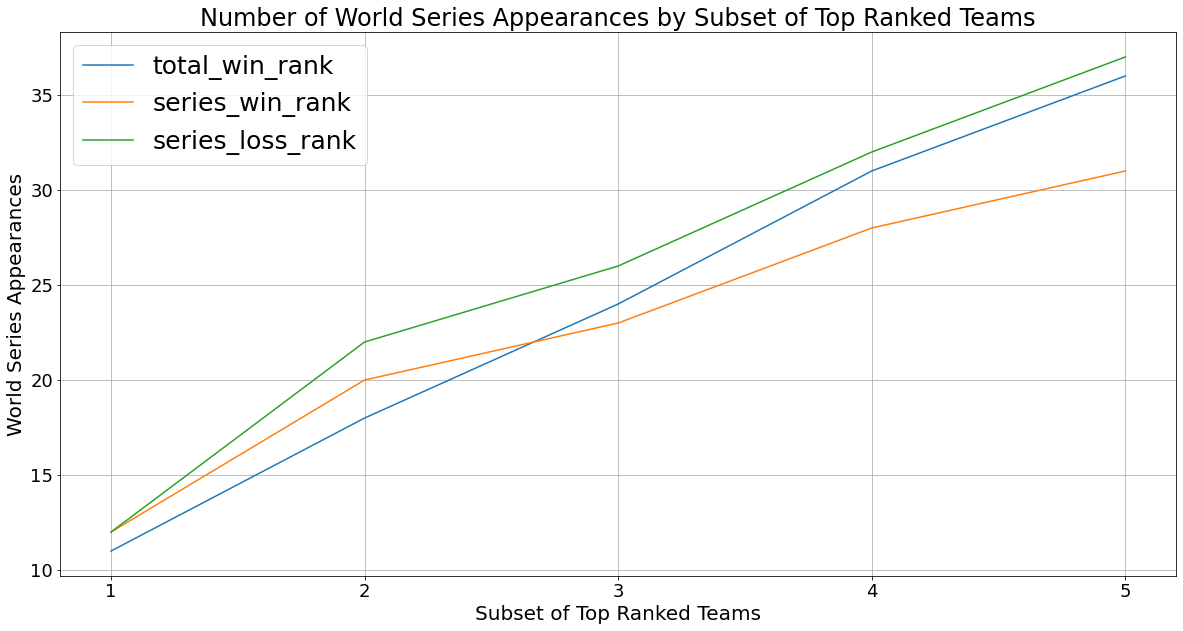

In [111]:
fig = plt.figure(figsize=(20, 10))
plt.plot(winRankMakeSpread2, label="total_win_rank")
plt.plot(seriesRankMakeSpread2, label="series_win_rank")
plt.plot(lossRankMakeSpread2, label="series_loss_rank")
plt.title('Number of World Series Appearances by Subset of Top Ranked Teams', fontsize=24)
plt.xlabel('Subset of Top Ranked Teams', fontsize=20)
plt.ylabel('World Series Appearances', fontsize=20)
plt.xticks(np.arange(0, 5, step=1), labels=("1", "2", "3", "4", "5"), fontsize=18)
plt.yticks(fontsize=18)
plt.grid(visible=True)
plt.legend(prop={'size': 25})
fig.savefig('worldSeriesRankSpreads2.jpg')
plt.show()